## PROJECT OVERVIEW

This project utilizes machine learning algorithms to build a model that effectively predicts customers at risk of churning. The dataset, sourced from Kaggle, includes 20 features mainly related to customer usage patterns, and consists of 3,333 records. Of these, 483 customers are identified as churners, while 2,850 are non-churners. The goal of the model is to classify the "churn" target variable using classification algorithms. The model's performance is evaluated using recall as the metric. Ultimately, the decision tree model, fine-tuned with hyperparameters, proves to be the most effective.

## BUSINESS UNDERSTANDING
### Business Problem
For telecommunications companies, growing their revenue base relies on both gaining new customers and enhancing customer retention. A major challenge for large enterprises is customer churn, which occurs when a subscriber or regular customer ends their subscription or stops doing business with the company. Churn can be driven by various factors, such as switching to a competitor with better prices, leaving due to poor customer support, or disconnecting from a brand because of limited engagement opportunities.

Syriatel, a mobile telecommunications and data services provider based in Damascus, Syria, offers a variety of services, including calls, messaging, GSM, and internet. The company has earned a strong reputation by focusing on customer satisfaction and social responsibility. Syriatel understands that maintaining long-term customer relationships is more cost-effective than constantly acquiring new customers. Therefore, predicting customer churn has become a crucial part of the company's strategy. This project aims to create a model that accurately identifies customers who are likely to churn and pinpoints the key features leading to this prediction. With this information, Syriatel can take proactive steps to prevent customer churn.

### Objectives
- To develop a machine learning model that can effectively predict customer churn using the information provided in the dataset..
- To pinpoint the key features that play a significant role in predicting customer churn.
- To provide recommendations on specific actions the Syriatel company can take to reduce churn based on model insights.

### Success Criteria
The primary evaluation metric for the classification algorithm is recall, focusing on correctly predicting customers at risk of churning. The ultimate objective is to minimize false negatives, as failing to detect a potential churner is more costly to the business than misclassifying a non-churner. A reliable model should achieve a minimum recall of 80%. However, a model predicting all customers as churners to maximize recall is not valuable, as not all customers will churn. Therefore, precision and accuracy will be monitored as secondary metrics.

## DATA UNDERSTANDING & PREPARATION
### Data Exploration

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

%matplotlib inline

In [71]:
# Load and preview top 5 records of the dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [72]:
# Preview the last 5 records
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [73]:
#Function to give a summary of the dataframe
def summarize_dataframe(df):
    print("--------------- Dataframe Info ---------------")
    df.info()
    
    print("\n--------------- DataFrame Shape ---------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    
    print("\n--------------- DataFrame Description ---------------")
    print(df.describe())
    
    print("\n--------------- DataFrame Duplicates ---------------")
    # Find duplicate rows
    print(df.duplicated().any())

In [74]:
summarize_dataframe(df)

--------------- Dataframe Info ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float6

## Data Cleaning

In [75]:
# Check for any missing values in the dataframe
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the output above, it is clear that there are no missing values in the dataframe

Since no mathemathical computation can be done on the area code, we can as well convert it to an object data type.

In [76]:
# Convert area code from integer to string
df["area code"] = df["area code"].astype(object)
df["area code"].dtype

dtype('O')

## Exploratory Data Analysis
### Univariate Analysis
churn is the target variable for this classification project. Therefore, we have to explore its characteristics, distribution, and properties without considering relationship with other variables

In [77]:
# Unique values of the target variable
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

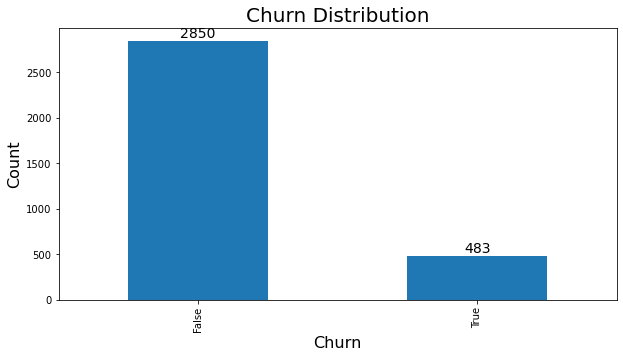

In [79]:
# Group the data by 'churn' and count the occurrences
churn_counts = df["churn"].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
churn_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Churn", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Churn Distribution", fontsize=20)

# Add text labels on top of the bars
for i, count in enumerate(churn_counts):
    ax.text(i, count, str(count), ha="center", va="bottom", fontsize=14)
plt.savefig("./images/classimbalance.png", dpi=300)
plt.show()

The bar chart above illustrates the distribution of the target variable "churn," with counts labeled atop each bar. The colors "skyblue" and "red" differentiate between churn and non-churn categories. The chart reveals a class imbalance, as shown by the uneven distribution of observations within the target class. Specifically, 85.51% of the data belongs to the "False" class, while the "True" class represents 14.49% of the dataset.

The dataframe has both continuous and categorical variables.

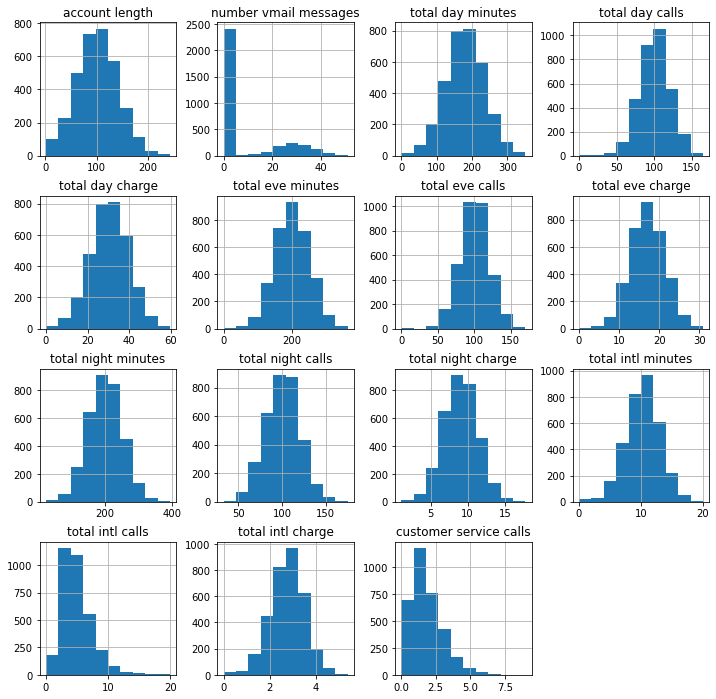

In [47]:
# Distribution of features
df.drop(columns="churn").hist(figsize=(12,12));
plt.savefig("./images/distribution.png", dpi=300)

Scaling varies among the features, and some of them do not exhibit a normal distribution. Consequently, it is necessary to perform both scaling and normalization on the features.

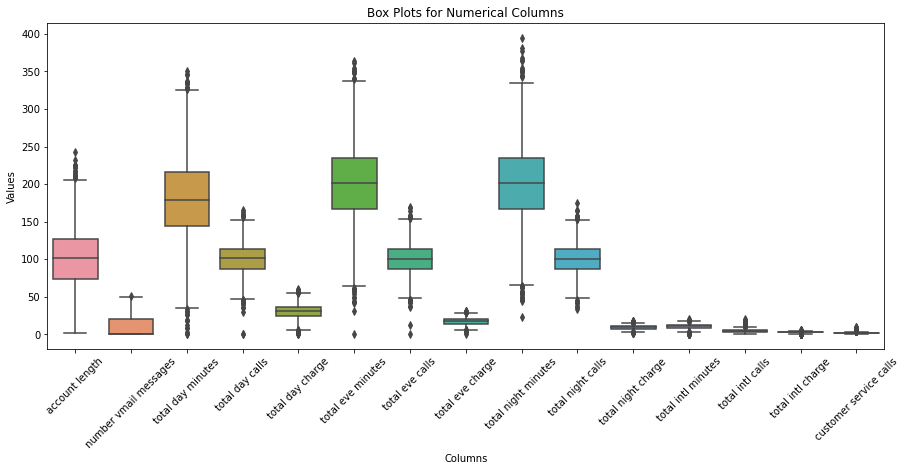

In [48]:
# Plot a box plot
data = ["account length","number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve minutes", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge", "total intl minutes", "total intl calls", "total intl charge", "customer service calls"]
num_df = df[ data]
plt.figure(figsize=(15,6))
sns.boxplot(data=num_df)
plt.xticks(rotation=45)
plt.title("Box Plots for Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

From the boxplot, there are some outliers. However, I chose to retain them to ensure that the observations remain authentic and meaningful, to preserve the completeness of my data, and to maintain the integrity of the analysis.

In [49]:
# Unique values of categorical features
categorical_cols = df.drop("phone number", axis=1).select_dtypes(include="object").columns
for col in categorical_cols:
    print(col.upper())
    print(df[col].unique())
    print("............................................................................ \n")

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
............................................................................ 

AREA CODE
[415 408 510]
............................................................................ 

INTERNATIONAL PLAN
['no' 'yes']
............................................................................ 

VOICE MAIL PLAN
['yes' 'no']
............................................................................ 



### Multivariate Analysis

In [50]:
# Checking for correlation
corr_matrix= df.corr().abs()
corr_matrix

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,0.004628,0.006216,0.038470,0.006214,0.006757,0.019260,0.006745,0.008955,0.013176,0.008960,0.009514,0.020661,0.009546,0.003796,0.016541
number vmail messages,0.004628,1.000000,0.000778,0.009548,0.000776,0.017562,0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,0.013263,0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,0.010155,0.008033,0.010092,0.013423,0.205151
total day calls,0.038470,0.009548,0.006750,1.000000,0.006753,0.021451,0.006462,0.021449,0.022938,0.019557,0.022927,0.021565,0.004574,0.021666,0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,0.010157,0.008032,0.010094,0.013427,0.205151
total eve minutes,0.006757,0.017562,0.007043,0.021451,0.007050,1.000000,0.011430,1.000000,0.012584,0.007586,0.012593,0.011035,0.002541,0.011067,0.012985,0.092796
total eve calls,0.019260,0.005864,0.015769,0.006462,0.015769,0.011430,1.000000,0.011423,0.002093,0.007710,0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,0.006745,0.017578,0.007029,0.021449,0.007036,1.000000,0.011423,1.000000,0.012592,0.007596,0.012601,0.011043,0.002541,0.011074,0.012987,0.092786
total night minutes,0.008955,0.007681,0.004323,0.022938,0.004324,0.012584,0.002093,0.012592,1.000000,0.011204,0.999999,0.015207,0.012353,0.015180,0.009288,0.035493
total night calls,0.013176,0.007123,0.022972,0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,0.013605,0.000305,0.013630,0.012802,0.006141


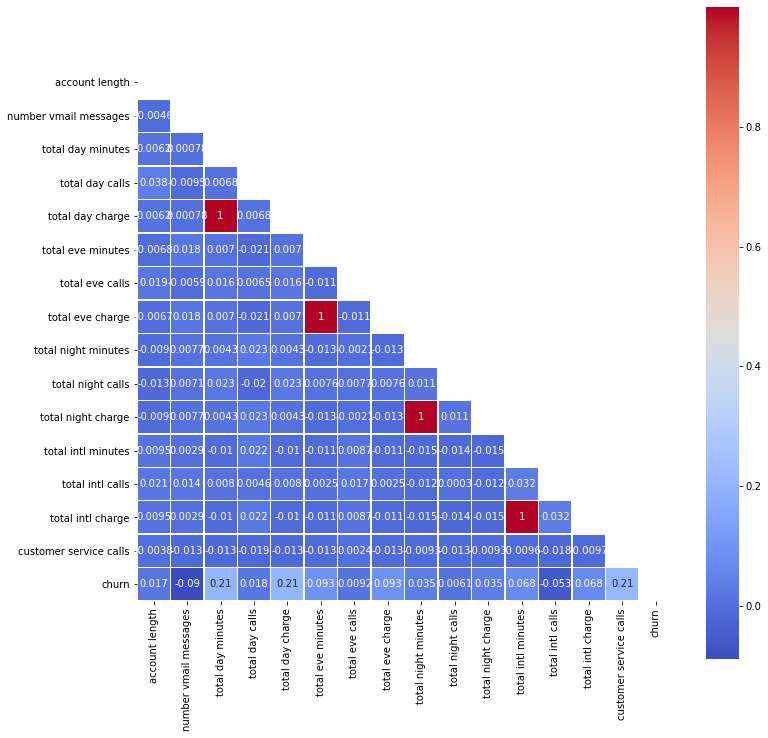

In [51]:
# Using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap="coolwarm")  # Change cmap here
plt.savefig("./images/corr.png", dpi=300)


* Most features exhibit a notably weak correlation with each other.
* Nonetheless, a perfect positive correlation is observed between specific pairs of variables: total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This correlation is anticipated since the charge of a call is inherently influenced by the call's duration in minutes. To address multicollinearity, it will be necessary to eliminate one variable from each correlated pair.

In [52]:
# Correlation between target variable (churn) and other independent variables
df.corr()["churn"]

account length            0.016541
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

* The highest correlation is between churn and customer service calls.
* The weakest correlation is between churn and number vmail messages.

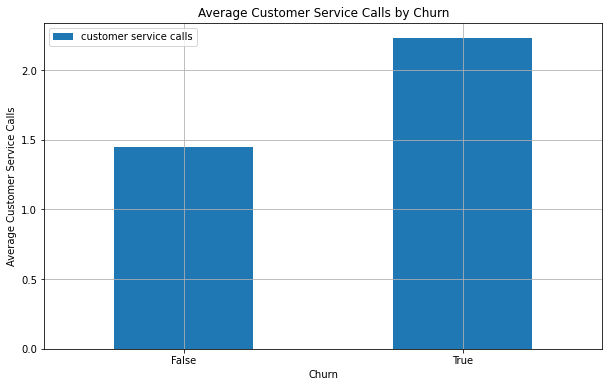

In [69]:
# Group data by "churn" and calculate the mean of "customer service calls"
churn_data = df.groupby("churn")["customer service calls"].mean()

plt.figure(figsize=(10, 6))

# Plot a bar chart
churn_data.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Average Customer Service Calls')
plt.title('Average Customer Service Calls by Churn')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.legend()
plt.grid(True)

plt.show()

Averagely, customers with two or more customer service calls are likely to churn.

## Data Preparation for Machine Learning
### Multicollinearity of Features

In [54]:
# Pairs with collinearity > 0.75
# Create a DataFrame to store correlation values and their corresponding pairs
df1 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Create a "pairs" column with tuples of the correlated variables
df1["pairs"] = list(zip(df1["level_0"], df1["level_1"]))

# Set 'pairs' as the index
df1.set_index(["pairs"], inplace=True)

# Drop unnecessary columns
df1.drop(columns=["level_1", "level_0"], inplace=True)

# Rename the column to 'cc' for correlation coefficient
df1.columns = ["collinearity"]

# Drop duplicate rows (keeping only one of each pair)
df1.drop_duplicates(inplace=True)

# Filter pairs with collinearity between 0.75 and 1 (excluding perfect correlations)
result = df1[(df1["collinearity"] > 0.75) & (df1["collinearity"] < 1)]
result

,collinearity
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl charge, total intl minutes)",0.999993


In [55]:
# Drop some columns to address the collinearity
df = df.drop(columns = ["total day charge", "total eve charge", "total night charge", "total intl charge"])
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

### Train-Test Split

In [56]:
# Select predictor and target variables
y = df["churn"]
X = df.drop(columns=["churn", "phone number"])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
# Preview of X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
817,UT,243,510,no,no,0,95.5,92,163.7,63,264.2,118,6.6,6,2
1373,SC,108,415,no,no,0,112.0,105,193.7,110,208.9,93,4.1,4,4
679,TX,75,415,yes,no,0,222.4,78,327.0,111,208.0,104,8.7,9,1
56,CO,141,415,no,no,0,126.9,98,180.0,62,140.8,128,8.0,2,1
1993,IN,86,510,no,no,0,216.3,96,266.3,77,214.0,110,4.5,3,0


### Transform Categorical Variables
Since some of my categorical variables were neither ordinal nor binomial data, I decided to use one-hot encoding to do the transformation of categorical data to numerical data.

In [58]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
817,243,0,95.5,92,163.7,63,264.2,118,6.6,6,...,0,0,0,0,0,0,0,1,0,0
1373,108,0,112.0,105,193.7,110,208.9,93,4.1,4,...,0,0,0,0,0,0,1,0,0,0
679,75,0,222.4,78,327.0,111,208.0,104,8.7,9,...,0,0,0,0,0,0,1,0,1,0
56,141,0,126.9,98,180.0,62,140.8,128,8.0,2,...,0,0,0,0,0,0,1,0,0,0
1993,86,0,216.3,96,266.3,77,214.0,110,4.5,3,...,0,0,0,0,0,0,0,1,0,0


### SMOTE
SMOTE addresses class imbalance issues by oversampling the minority class with replacement.

In [59]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

True     2284
False    2284
Name: churn, dtype: int64


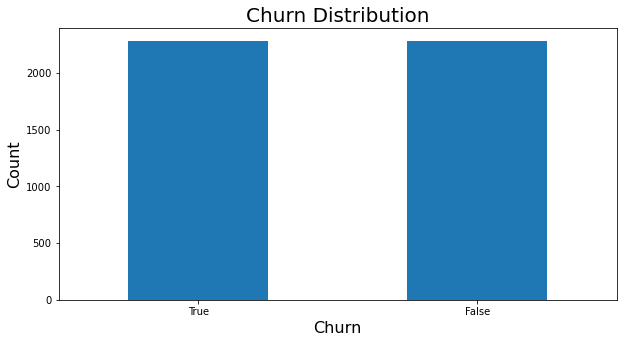

In [81]:
# Bar chart showing distribution of target variable
# Calculate the value counts of the target variable
value_counts = y_train_resampled.value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 5))
value_counts.plot(kind="bar")
plt.xlabel("Churn", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Churn Distribution", fontsize=20)
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()

The issue of class imbalance has been solved

In [61]:
# SMOTE not applied to test data
y_test.value_counts()

False    566
True     101
Name: churn, dtype: int64

SMOTE was exclusively employed on the training sets, guaranteeing that the model's performance assessment utilizes an unaltered test sample, free from oversampling or undersampling.

# MODELLING
The baseline model for this analysis is the logistic regression model. We have opted for the 'liblinear' solver due to the relatively small size of the dataset.

Recall_score:
Train:  0.8642732049036778
Test:  0.2376237623762376

Precision_score:
Train:  0.9527027027027027
Test:  0.46153846153846156

Accuracy_score:
Train:  0.9106830122591943
Test:  0.8425787106446777


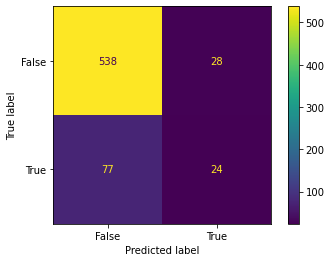

In [62]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Initialize the Logistic Regression model with desired parameters
logreg_model = LogisticRegression(fit_intercept=False, solver="liblinear")

# Fit the Logistic Regression model on the scaled training data
logreg_model.fit(X_train_scaled, y_train_resampled)

# Function to evaluate the performance of the model
def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print("Recall_score:")
    print("Train: ", recall_score(y_train, y_train_preds))
    print("Test: ", recall_score(y_test, y_test_preds))
    
    print("\nPrecision_score:")
    print("Train: ", precision_score(y_train, y_train_preds))
    print("Test: ", precision_score(y_test, y_test_preds))
    
    print("\nAccuracy_score:")
    print("Train: ", accuracy_score(y_train, y_train_preds))
    print("Test: ", accuracy_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Evaluate the performance of the Logistic Regression model
evaluate(logreg_model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

The model exhibits overfitting as it excels on the training data but underperforms on the test data. Despite achieving high accuracy on the test dataset, it displays a notably low recall score. This suboptimal performance is primarily attributed to the substantial count of false negatives.

## Decision Tree Model

Recall_score:
Train:  1.0
Test:  0.7227722772277227

Precision_score:
Train:  1.0
Test:  0.46794871794871795

Accuracy_score:
Train:  1.0
Test:  0.8335832083958021


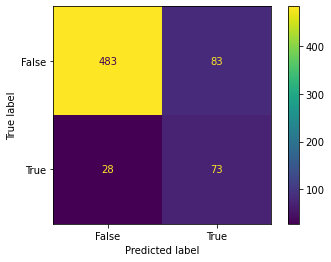

In [63]:
# Initialize the Decision Tree model with the desired random state
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model with resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Function to evaluate the performance of the Decision Tree model
def evaluate_dt(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print("Recall_score:")
    print("Train: ", recall_score(y_train, y_train_preds))
    print("Test: ", recall_score(y_test, y_test_preds))
    
    print("\nPrecision_score:")
    print("Train: ", precision_score(y_train, y_train_preds))
    print("Test: ", precision_score(y_test, y_test_preds))
    
    print("\nAccuracy_score:")
    print("Train: ", accuracy_score(y_train, y_train_preds))
    print("Test: ", accuracy_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

# Evaluate the performance of the Decision Tree model
evaluate_dt(dt_model, X_train_resampled, y_train_resampled, X_test, y_test)


This model has a higher recall score. The model is also overfitting like the logistic regression model but I will hypertune it to get my best model. This is the best model since I want to minimize false negatives which can only be done best with a model with a high recall score.

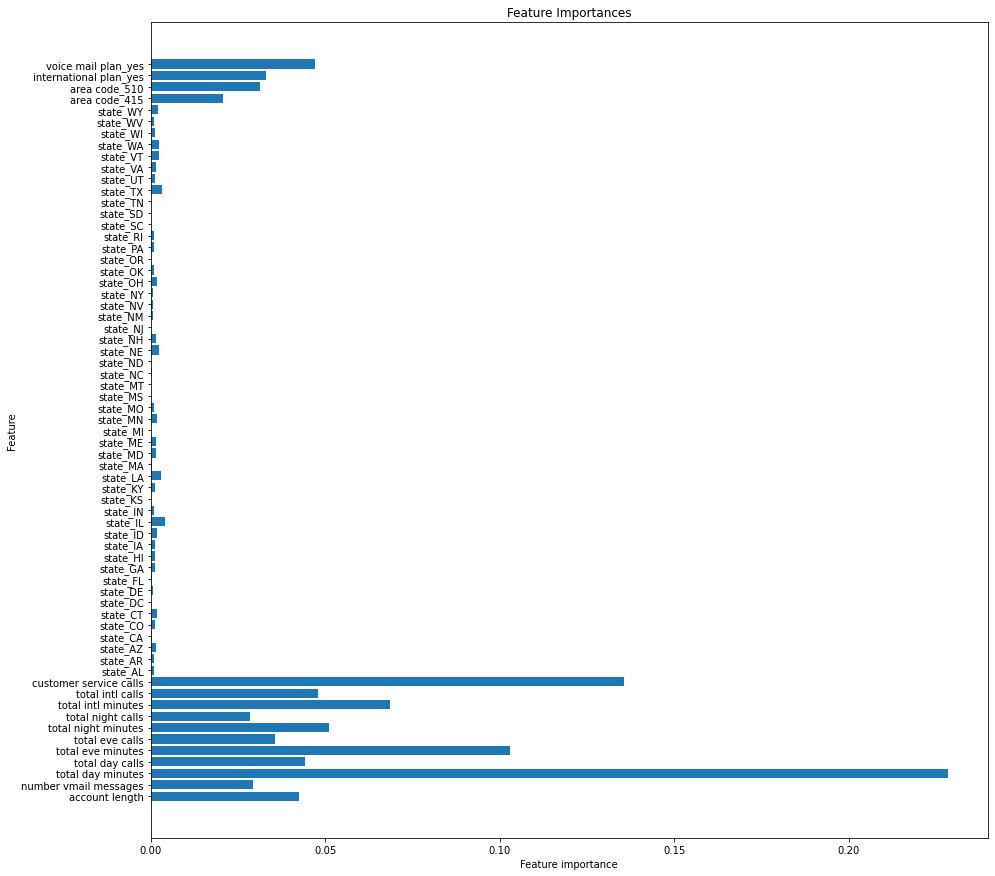

In [64]:
# Function to plot feature importances
def plot_feature_importances(model, X, figsize):
    plt.figure(figsize=figsize)
    plt.barh(X.columns, model.feature_importances_, align="center") 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances")
    plt.show()

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model with the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Call the function with your decision tree model and X_train_resampled
plot_feature_importances(dt_model, X_train_resampled, (15, 15))

The most influential factors for predicting customer churn are, in descending order of importance, total day minutes, total evening minutes, and customer service calls. On the other hand, the state variable has minimal significance in predicting customer churn.

## Feature Selection
Recursive feature elimination with cross-validation is employed to identify a subset of features that are pertinent for constructing the model.

Recall_score:
Train:  1.0
Test:  0.7326732673267327

Precision_score:
Train:  1.0
Test:  0.4900662251655629

Accuracy_score:
Train:  1.0
Test:  0.8440779610194903


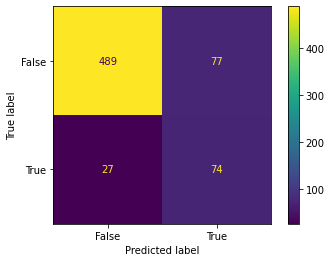

In [65]:
# Step 1: Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 2: Feature selection using RFECV with DecisionTreeClassifier
dt_estimator = DecisionTreeClassifier(random_state=42)
rfecv = RFECV(estimator=dt_estimator, scoring='recall')
rfecv.fit(X_train_resampled_scaled, y_train_resampled)

# Step 3: Transform the data based on the selected features
X_train_resampled_selected = rfecv.transform(X_train_resampled_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

# Step 4: Initialize the Decision Tree model with the desired random state
dt_model = DecisionTreeClassifier(random_state=42)

# Step 5: Fit the Decision Tree model with the selected features
dt_model.fit(X_train_resampled_selected, y_train_resampled)

# Evaluation function (as previously defined)
def evaluate_dt(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    print("Recall_score:")
    print("Train: ", recall_score(y_train, y_train_preds))
    print("Test: ", recall_score(y_test, y_test_preds))
    
    print("\nPrecision_score:")
    print("Train: ", precision_score(y_train, y_train_preds))
    print("Test: ", precision_score(y_test, y_test_preds))
    
    print("\nAccuracy_score:")
    print("Train: ", accuracy_score(y_train, y_train_preds))
    print("Test: ", accuracy_score(y_test, y_test_preds))
    
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

# Evaluate the performance of the Decision Tree model
evaluate_dt(dt_model, X_train_resampled_selected, y_train_resampled, X_test_selected, y_test)


In [66]:
# Optimal number of features selected via cross-validation
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 14


There are 14 optimal features
The chosen features are shown below:

In [67]:
# Chosen features (assigned a rank of 1)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rfecv_df[rfecv_df["Rank"] == 1]

,Rank
account length,1
area code_510,1
international plan_yes,1
customer service calls,1
total intl calls,1
total intl minutes,1
total night calls,1
voice mail plan_yes,1
total eve calls,1
total eve minutes,1


In [68]:
# Remove columns that are not part of the optimal features
cols = rfecv_df[rfecv_df["Rank"] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head()

,account length,area code_510,international plan_yes,customer service calls,total intl calls,total intl minutes,total night calls,voice mail plan_yes,total eve calls,total eve minutes,total day calls,total night minutes,total day minutes,number vmail messages
0,243,1,0,2,6,6.6,118,0,63,163.7,92,264.2,95.5,0
1,108,0,0,4,4,4.1,93,0,110,193.7,105,208.9,112.0,0
2,75,0,1,1,9,8.7,104,0,111,327.0,78,208.0,222.4,0
3,141,0,0,1,2,8.0,128,0,62,180.0,98,140.8,126.9,0
4,86,1,0,0,3,4.5,110,0,77,266.3,96,214.0,216.3,0


## Hyperparameter Tuning of The Decision Tree Model

The hyperparameters of the decision tree, such as max_depth, min_samples_leaf, and min_samples_split, can be adjusted to control the tree's growth and prevent overfitting of the model.

In [80]:
import warnings
warnings.filterwarnings("ignore")
# Define the parameter grid
param_grid = {"criterion": ["gini", "entropy"],
             "max_depth": range(14, 32, 2),
             "min_samples_split" : range(2, 10, 2),
             "min_samples_leaf": [2, 3, 5, 7, 10],
             "max_features": [11, 13, 15]
}
# Set up the Grid Search
grid_search = GridSearchCV(dt_model, param_grid, cv=4, scoring="recall", verbose=1)

# Fit the Grid Search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  3.2min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(14, 32, 2),
                         'max_features': [11, 13, 15],
                         'min_samples_leaf': [2, 3, 5, 7, 10],
                         'min_samples_split': range(2, 10, 2)},
             scoring='recall', verbose=1)

In [33]:
# Parameters that gave the best result
print(f"Optimal parameters: {grid_search.best_params_}")

# Mean cross-validated score of the best_estimator
print(f"Validation recall: {grid_search.best_score_}")

Optimal parameters: {'criterion': 'entropy', 'max_depth': 24, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation recall: 0.8651488616462347


Recall_score:
Train:  0.9728546409807356
Test:  0.7425742574257426

Precision_score:
Train:  0.9964125560538116
Test:  0.46875

Accuracy_score:
Train:  0.9846760070052539
Test:  0.8335832083958021


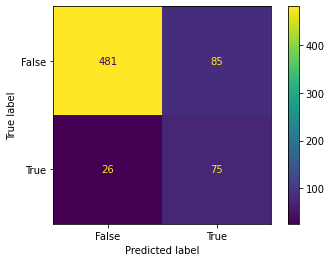

In [34]:
# Evaluate the performance of the tuned model
evaluate_dt(grid_search, X_train_resampled, y_train_resampled, X_test, y_test)

After fine-tuning the model, there is an improvement in the model's performance, particularly in terms of the recall score. Nevertheless, the precision score has slightly decreased. Notably, the gap between the training and testing scores has also narrowed, indicating a reduction in overfitting.

## Model Evaluation
- The decision tree model with tuned hyperparameters has emerged as the top-performing model. It is optimized with the following parameters: {'criterion': 'entropy', 'max_depth': 24, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}. This model excels in achieving the highest recall score, and its accuracy and precision scores are well above average.


- However, it's worth noting that the recall score falls slightly short of the target of at least 80%.


- The performance metrics for the tuned decision tree model are detailed below:

In [35]:
# Evaluation metrics of the best model based on the test data
print("DECISION TREE (TUNED) SCORES:")
print("Test Recall Score: ", recall_score(y_test, grid_search.predict(X_test)))
print("Test Precision Score: ", precision_score(y_test, grid_search.predict(X_test)))
print("Test Accuracy Score: ", accuracy_score(y_test, grid_search.predict(X_test)))

DECISION TREE (TUNED) SCORES:
Test Recall Score:  0.7425742574257426
Test Precision Score:  0.46875
Test Accuracy Score:  0.8335832083958021


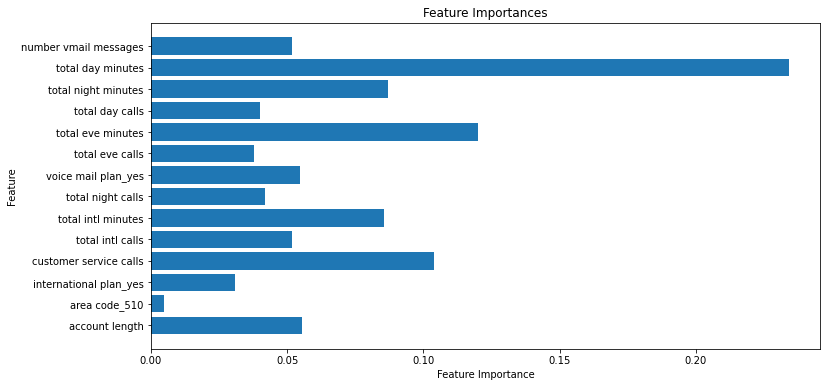

<Figure size 432x288 with 0 Axes>

In [36]:
# Function to plot feature importances
def plot_feature_importances(model, feature_names, figsize=None):
    plt.figure(figsize=figsize)
    plt.barh(feature_names, model.feature_importances_, align="center")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances")
    plt.show()

# Call the function with the best model and feature names
plot_feature_importances(grid_search.best_estimator_, X_train_resampled.columns, (12, 6))

# Save the plot
plt.savefig("./images/evaluation.png", dpi=300)


# Conclusions
* The chosen model for predicting customer churn is the decision tree with fine-tuned hyperparameters, boasting the lowest count of false negatives.


* Key features crucial for forecasting customer churn are:

    - `Total Day Minutes:` Reflects the cumulative minutes spent by the customer on daytime calls.

    - `Total Evening Minutes:` Sums up the minutes spent on evening calls by the customer.

    - `Customer Service Calls:` Indicates the number of calls the customer has initiated to reach customer service.

# Recommendation
1. **Customer Service Strategy:** Syriatel should ensure a robust customer service strategy to meet customer expectations effectively and assess customer interactions. This includes tracking and addressing both positive and negative feedback from customers.
 

2. **Resolve Customer Issues:** Since customer service calls have the highest correlation with churn, implying that the more times a customer initiates a call to reach customer service, the more likely they are to churn. Syriatel should ensure that issues raised by clients who call are resolved promptly and efficiently.


3. **Call Charge Rates:** Given that total day and night minutes are key factors for predicting churn, Syriatel should assess its call charge rates in comparison to competitors. Lowering the charges per minute for calls could prove instrumental in retaining customers and preventing churn.

## Next Steps
- Deploy the model for real-time customer churn prediction
- To further refine the model and overcome challenges like overfitting, additional data collection is essential. This could include gathering data on customer satisfaction, competitor pricing, and service quality metrics. Deploying the model into a live environment will also provide valuable feedback for continuous improvement.